In [2]:
import pickle as pkl
import numpy as np
import pandas as pd 


with open('/content/drive/MyDrive/Dataset_with_memory /1min/X_train.pickle', 'rb') as f:
    X_train = pkl.load(f)

with open('/content/drive/MyDrive/Dataset_with_memory /1min/Y_train.pickle', 'rb') as f:
    Y_train = pkl.load(f)


with open('/content/drive/MyDrive/Dataset_with_memory /1min/Y_val.pickle', 'rb') as f:
    Y_val = pkl.load(f)

with open('/content/drive/MyDrive/Dataset_with_memory /1min/X_val.pickle', 'rb') as f:
     X_val = pkl.load(f)

with open('/content/drive/MyDrive/Dataset_with_memory /1min/Y_test.pickle', 'rb') as f:
    Y_test = pkl.load(f)

with open('/content/drive/MyDrive/Dataset_with_memory /1min/X_test.pickle', 'rb') as f:
     X_test = pkl.load(f)


Y_train = Y_train.reshape((-1,1))
Y_val = Y_val.reshape((-1,1))
Y_test = Y_test.reshape((-1,1))

X_train.shape , Y_train.shape , X_val.shape , Y_val.shape , X_test.shape , Y_test.shape

((225480, 120, 5),
 (225480, 1),
 (45000, 120, 5),
 (45000, 1),
 (135240, 120, 5),
 (135240, 1))

In [8]:
import tensorflow as tf
import keras

# Define the CNN model
model = tf.keras.Sequential([
    # Convolutional layers
    tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(120, 5)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    
    # Flatten the output of the convolutional layers
    tf.keras.layers.GlobalAveragePooling1D(),
    
    # Dense layers
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.0005 )
model.compile(loss='binary_crossentropy', optimizer=optimizer , metrics=['binary_accuracy'])

# Print the summary of the model
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 118, 256)          4096      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 59, 256)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 57, 256)           196864    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 28, 256)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 26, 256)           196864    
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 13, 256)         

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = '/content/drive/MyDrive/my_best_model_CNN.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_binary_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


earlystopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callback = [checkpoint,earlystopping]

history = model.fit(X_train, Y_train,  epochs=50, batch_size=50, verbose =1 , callbacks=callback ,validation_data=(X_val, Y_val))


Epoch 1/50
4510/4510 [==============================] - ETA: 0s - loss: 0.6823 - binary_accuracy: 0.5736
Epoch 1: val_binary_accuracy improved from -inf to 0.49360, saving model to /content/drive/MyDrive/my_best_model_CNN.hdf5
4510/4510 [==============================] - 33s 7ms/step - loss: 0.6823 - binary_accuracy: 0.5736 - val_loss: 0.7036 - val_binary_accuracy: 0.4936
Epoch 2/50
4507/4510 [============================>.] - ETA: 0s - loss: 0.6817 - binary_accuracy: 0.5738
Epoch 2: val_binary_accuracy did not improve from 0.49360
4510/4510 [==============================] - 30s 7ms/step - loss: 0.6817 - binary_accuracy: 0.5738 - val_loss: 0.7046 - val_binary_accuracy: 0.4936
Epoch 3/50
4508/4510 [============================>.] - ETA: 0s - loss: 0.6815 - binary_accuracy: 0.5738
Epoch 3: val_binary_accuracy did not improve from 0.49360
4510/4510 [==============================] - 29s 6ms/step - loss: 0.6815 - binary_accuracy: 0.5738 - val_loss: 0.7051 - val_binary_accuracy: 0.4936
Epo

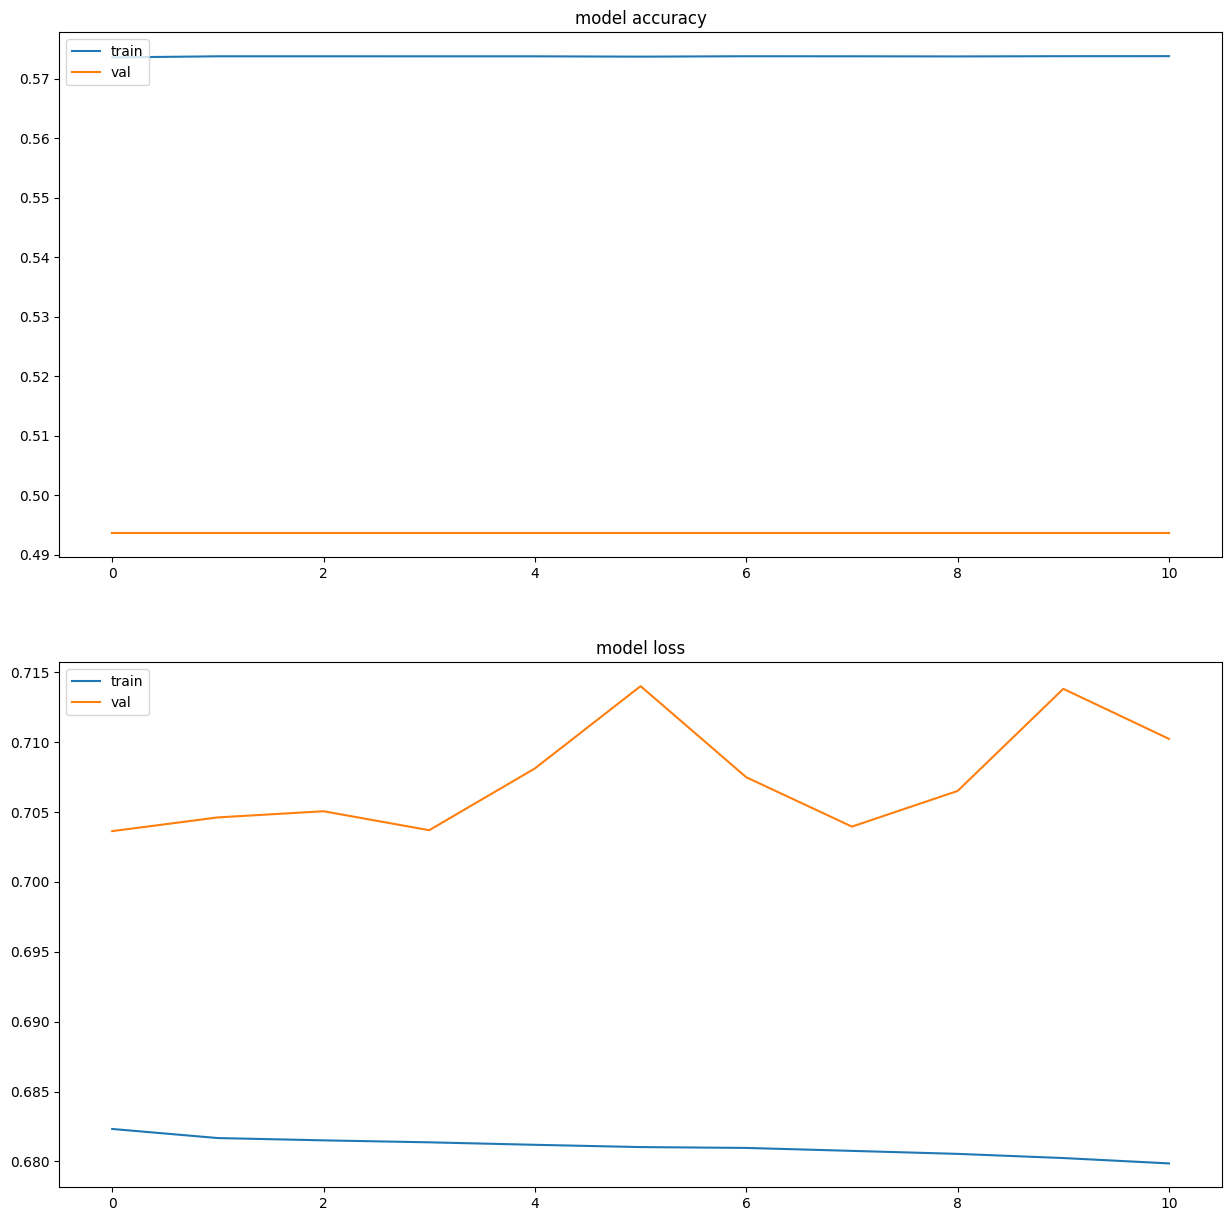

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1, figsize = (15,15))
axs = axs.flatten()
axs[0].plot(history.history['binary_accuracy'])
axs[0].plot(history.history['val_binary_accuracy'])
axs[0].set_title('model accuracy')

axs[0].legend(['train', 'val'], loc='upper left')

# summarize history for loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('model loss')

axs[1].legend(['train', 'val'], loc='upper left')
